# San Francisco Housing Rental Analysis

In this assignment, you will perform basic analysis for the San Francisco Housing Market to allow potential real estate investors to choose rental investment properties. 

In [71]:
# initial imports
import os
import pandas as pd
import matplotlib.pyplot as plt
import hvplot.pandas
import plotly.express as px
from pathlib import Path

%matplotlib inline

In [72]:
# Read the Mapbox API key
mapbox_token = os.getenv("MAPBOX_API_KEY")
px.set_mapbox_access_token(mapbox_token)

## Load Data

In [73]:
# Read the census data into a Pandas DataFrame
file_path = Path("Data/sfo_neighborhoods_census_data.csv")
sfo_data = pd.read_csv(file_path, index_col="year")
sfo_data.head()

,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
year,,,,
2010,Alamo Square,291.182945,372560,1239
2010,Anza Vista,267.932583,372560,1239
2010,Bayview,170.098665,372560,1239
2010,Buena Vista Park,347.394919,372560,1239
2010,Central Richmond,319.027623,372560,1239


- - - 

## Housing Units Per Year

In this section, you will calculate the number of housing units per year and visualize the results as a bar chart using the Pandas plot function. 

Hint: Use the Pandas groupby function

Optional challenge: Use the min, max, and std to scale the y limits of the chart.

In [122]:
# Calculate the mean number of housing units per year (hint: use groupby) 
new_df = sfo_data.groupby('year').mean()
year_units = new_df.drop(columns = ["sale_price_sqr_foot", "gross_rent"])
year_units

,housing_units
year,
2010,372560
2011,374507
2012,376454
2013,378401
2014,380348
2015,382295
2016,384242


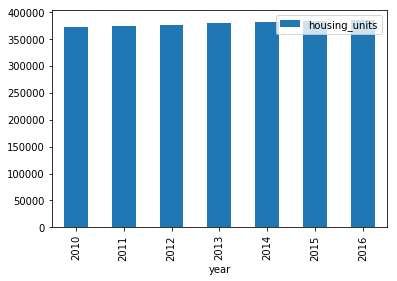

In [75]:
year_units.plot.bar()

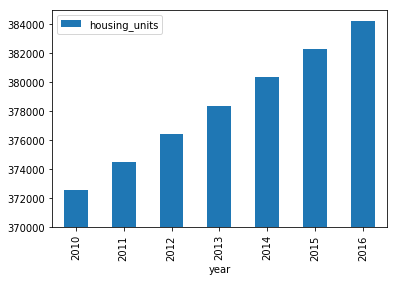

In [76]:
# Use the Pandas plot function to plot the average housing units per year.
# Note: You will need to manually adjust the y limit of the chart using the min and max values from above.

year_units.plot.bar(ylim = (370000, 385000))

# Optional Challenge: Use the min, max, and std to scale the y limits of the chart

# plt.show()
# plt.close(fig_housing_units)

- - - 

## Average Prices per Square Foot

In this section, you will calculate the average gross rent and average sales price for each year. Plot the results as a line chart.

### Average Gross Rent in San Francisco Per Year

In [124]:
# Calculate the average gross rent and average sale price per square foot
rent_sale = sfo_data.drop(columns = ["neighborhood", "housing_units", "gross_rent"])
mean = rent_sale.groupby(["year"]).mean()
mean

,sale_price_sqr_foot
year,
2010,369.344353
2011,341.903429
2012,399.389968
2013,483.600304
2014,556.277273
2015,632.540352
2016,697.643709


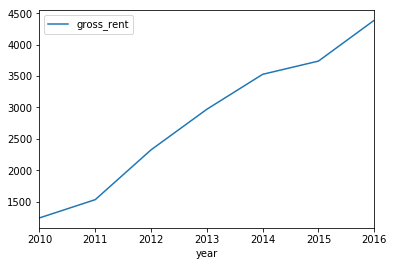

In [78]:
# Plot the Average Gross Rent per Year as a Line Chart 
mean1 = mean.drop(columns = "sale_price_sqr_foot")
mean1.plot.line()

### Average Sales Price per Year

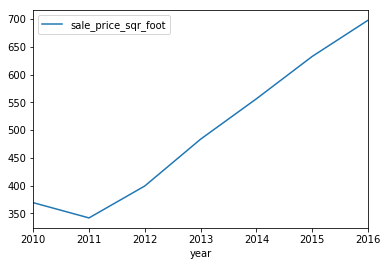

In [79]:
# Plot the Average Sales Price per Year as a line chart
sale_price = mean.drop(columns = "gross_rent")
sale_price.plot.line()

- - - 

## Average Prices by Neighborhood

In this section, you will use hvplot to create an interactive visulization of the Average Prices with a dropdown selector for the neighborhood.

Hint: It will be easier to create a new DataFrame from grouping the data and calculating the mean prices for each year and neighborhood

In [80]:
# Group by year and neighborhood and then create a new dataframe of the mean values
file_path = Path("Data/sfo_neighborhoods_census_data.csv")
hood_df = pd.read_csv(file_path, index_col="year")
neighborhood1 = hood_df.groupby(["year", "neighborhood"]).mean()
neighborhood1

sale_price_sqr_foot  housing_units  \
year neighborhood                                                        
2010 Alamo Square                            291.182945         372560   
     Anza Vista                              267.932583         372560   
     Bayview                                 170.098665         372560   
     Buena Vista Park                        347.394919         372560   
     Central Richmond                        319.027623         372560   
     Central Sunset                          418.172493         372560   
     Corona Heights                          369.359338         372560   
     Cow Hollow                              569.379968         372560   
     Croker Amazon                           165.645730         372560   
     Diamond Heights                         456.930822         372560   
     Downtown                                241.804552         372560   
     Eureka Valley/Dolores Heights           403.118313         372560   
     Excelsior                               364.928336         372560   
     Financial District North                401.749967         372560   
     Financial District South                162.821210         372560   
     Forest Knolls                           209.049327         372560   
     Glen Park                               715.586438         372560   
     Golden Gate Heights                     551.801119         372560   
     Haight Ashbury                          254.473779         372560   
     Hayes Valley                            272.284980         372560   
     Hunters Point                           170.624920         372560   
     Ingleside                               275.056686         372560   
     Inner Mission                           238.350020         372560   
     Inner Parkside                          199.702004         372560   
     Inner Richmond                          285.822358         372560   
     Inner Sunset                            275.769730         372560   
     Jordan Park/Laurel Heights              419.887812         372560   
     Lake --The Presidio                     320.796910         372560   
     Lone Mountain                           398.458876         372560   
     Lower Pacific Heights                   374.057636         372560   
...                                                 ...            ...   
2016 Inner Mission                           647.770447         384242   
     Inner Parkside                          518.112650         384242   
     Inner Richmond                          403.311132         384242   
     Inner Sunset                            445.923828         384242   
     Jordan Park/Laurel Heights              704.566419         384242   
     Lower Pacific Heights                   636.430770         384242   
     Marina                                  431.944602         384242   
     Merced Heights                         1416.666667         384242   
     Mission Bay                             924.569116         384242   
     Mission Terrace                         879.017013         384242   
     Nob Hill                                777.008315         384242   
     Noe Valley                              799.495651         384242   
     North Beach                             407.553322         384242   
     Outer Mission                            40.772625         384242   
     Outer Parkside                          732.720684         384242   
     Outer Richmond                         1196.645437         384242   
     Outer Sunset                            510.576907         384242   
     Pacific Heights                         996.389364         384242   
     Park North                              211.301370         384242   
     Parnassus/Ashbury Heights              1207.997485         384242   
     Potrero Hill                            707.651609         384242   
     Presidio Heights                   

In [81]:
# Use hvplot to create an interactive line chart of the average price per sq ft.
# The plot should have a dropdown selector for the neighborhood
neighborhood1.hvplot.line("year", "sale_price_sqr_foot", groupby = "neighborhood")

:DynamicMap   [neighborhood]
   :Curve   [year]   (sale_price_sqr_foot)

- - - 

## The Top 10 Most Expensive Neighborhoods

In this section, you will need to calculate the mean sale price for each neighborhood and then sort the values to obtain the top 10 most expensive neighborhoods on average. Plot the results as a bar chart.

In [125]:
# Getting the data from the top 10 expensive neighborhoods
neighborhoods = neighborhood1.groupby("neighborhood").mean()
neighborhoods1 = neighborhoods.drop(columns = ["housing_units", "gross_rent"])
neighborhood_rank = neighborhoods1.sort_values(by='sale_price_sqr_foot', ascending=False)
neighborhood_rank.reset_index(inplace=True)
top10 = neighborhood_rank.head(10)
top10.round(2)

,neighborhood,sale_price_sqr_foot
0,Union Square District,903.99
1,Merced Heights,788.84
2,Miraloma Park,779.81
3,Pacific Heights,689.56
4,Westwood Park,687.09
5,Telegraph Hill,676.51
6,Presidio Heights,675.35
7,Cow Hollow,665.96
8,Potrero Hill,662.01
9,South Beach,650.12


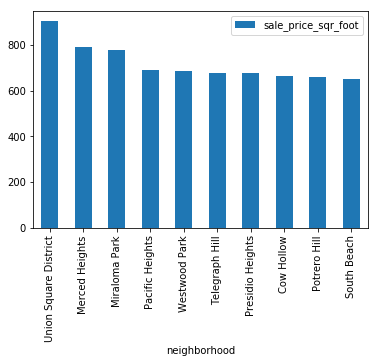

In [129]:
# Plotting the data from the top 10 expensive neighborhoods
top10.plot.bar(ylim = (0, 950), x = "neighborhood")

- - - 

## Parallel Coordinates and Parallel Categories Analysis

In this section, you will use plotly express to create parallel coordinates and parallel categories visualizations so that investors can interactively filter and explore various factors related to the sales price of the neighborhoods. 

Using the DataFrame of Average values per neighborhood (calculated above), create the following visualizations:
1. Create a Parallel Coordinates Plot
2. Create a Parallel Categories Plot

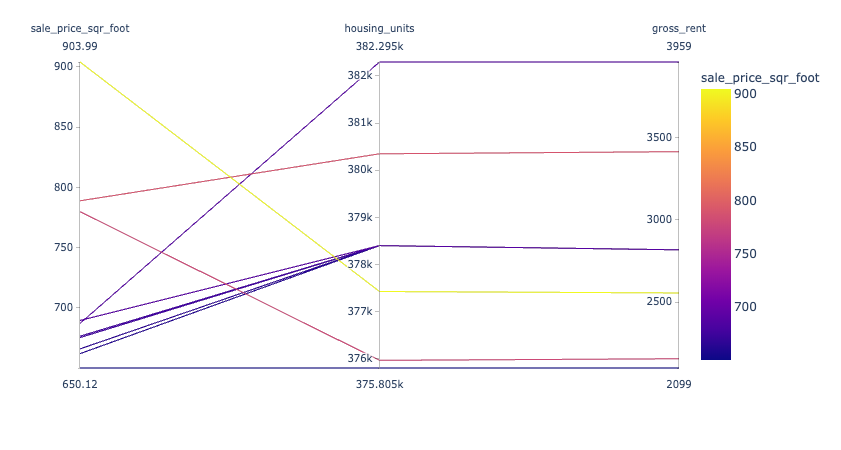

In [84]:
# Parallel Coordinates Plot

px.parallel_coordinates(top10, color='sale_price_sqr_foot')

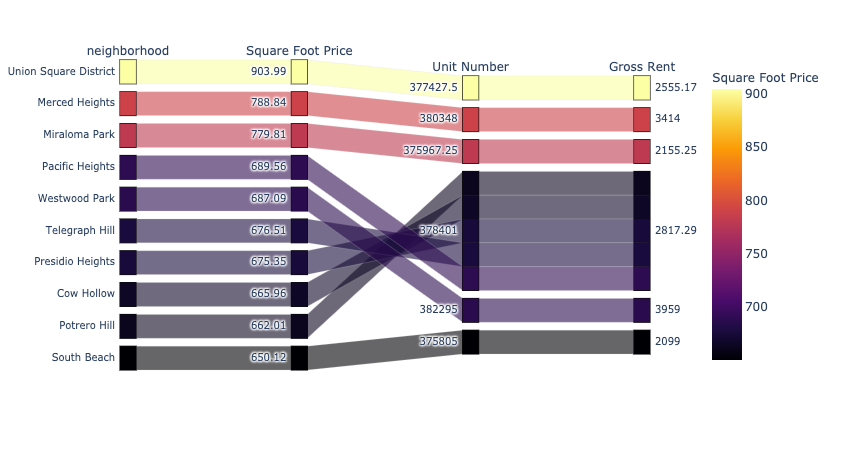

In [85]:
# Parallel Categories Plot
px.parallel_categories(
    top10.round(2),
    dimensions=["neighborhood", "sale_price_sqr_foot", "housing_units", "gross_rent"],
    color="sale_price_sqr_foot",
    color_continuous_scale=px.colors.sequential.Inferno,
    labels={
        "gross_rent": "Gross Rent",
        "sale_price_sqr_foot": "Square Foot Price",
        "housing_units": "Unit Number",
    },
)

- - - 

## Neighborhood Map

In this section, you will read in neighboor location data and build an interactive map with the average prices per neighborhood. Use a scatter_mapbox from plotly express to create the visualization. Remember, you will need your mapbox api key for this.

### Load Location Data

In [ ]:
#### Load neighborhoods coordinates data
file_path = Path("Data/neighborhoods_coordinates.csv")
df_neighborhood_locations = pd.read_csv(file_path)
neighborhood_df = df_neighborhood_locations.drop(columns = "Neighborhood")
df_neighborhood_locations.head()

#### Data Preparation

You will need to join the location data with the mean prices per neighborhood

1. Calculate the mean values for each neighborhood
2. Join the average values with the neighborhood locations

In [115]:
# Calculate the mean values for each neighborhood
n = neighborhood_rank.drop(columns= (["housing_units", "gross_rent"]))
mean_values = n.groupby(["neighborhood"]).mean()
mean_values.head()

,sale_price_sqr_foot
neighborhood,
Alamo Square,366.020712
Anza Vista,373.382198
Bayview,204.588623
Bayview Heights,590.792839
Bernal Heights,576.746488


In [120]:
# Join the average values with the neighborhood locations
df_neighborhood_locations1 = pd.concat([mean_values, neighborhood_df], join = "inner", axis = "columns")
df_neighborhood_locations1.head()

,sale_price_sqr_foot,Lat,Lon
Alamo Square,366.020712,37.791012,-122.402100
Anza Vista,373.382198,37.779598,-122.443451
Bayview,204.588623,37.734670,-122.401060
Bayview Heights,590.792839,37.728740,-122.410980
Buena Vista Park,452.680591,37.768160,-122.439330


### Mapbox Visualization

Plot the aveage values per neighborhood with a plotly express scatter_mapbox visualization.

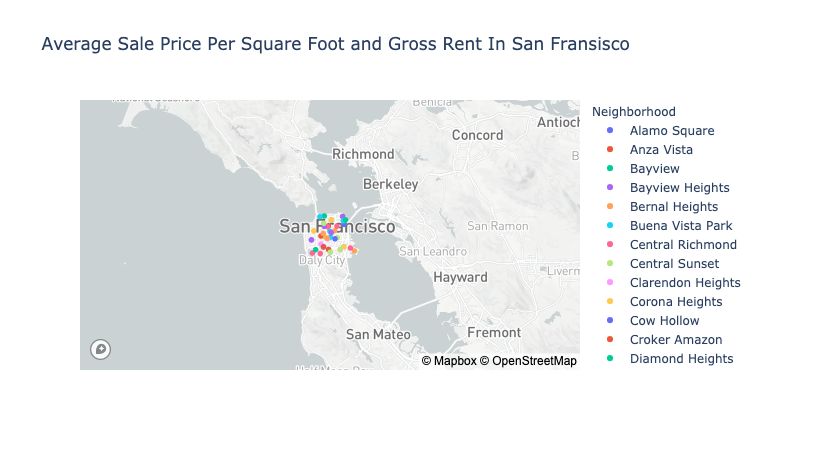

In [121]:
# Create a scatter mapbox to analyze neighborhood info
px.scatter_mapbox(df_neighborhood_locations, title = "Average Sale Price Per Square Foot and Gross Rent In San Fransisco", lat="Lat", lon="Lon",  color="Neighborhood")